✅ Using device: cuda
🔄 Loading FLAN-T5 model for prompt refinement...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

🎨 Loading Stable Diffusion Turbo model (fast version)...


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


⚠️ xFormers not available, continuing without it.
Enter your text prompt: A cat wearing sunglasses and riding a skateboard

🧠 Refining your text prompt using LLM...

✨ Refined Prompt:
A cat is riding a skateboard.

🎨 Generating image (this may take ~5–10 seconds)...


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image saved as generated_image.png


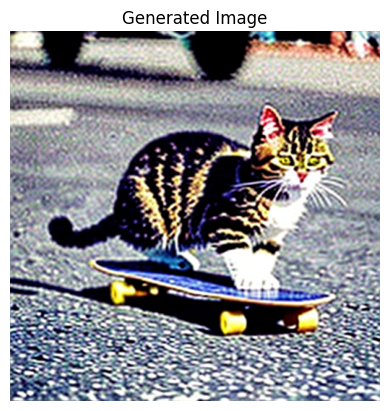

In [1]:
# =========================================================
# 🚀 STEP 1: Install required libraries
# =========================================================
!pip install torch torchvision transformers diffusers accelerate safetensors sentencepiece

# =========================================================
# 🚀 STEP 2: Import necessary libraries
# =========================================================
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# =========================================================
# 🚀 STEP 3: Check device (GPU or CPU)
# =========================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print("✅ Using device:", device)

# =========================================================
# 🚀 STEP 4: Load LLM model (FLAN-T5) for text prompt refinement
# =========================================================
print("🔄 Loading FLAN-T5 model for prompt refinement...")
llm_model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(llm_model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(llm_model_name).to(device)

# =========================================================
# 🚀 STEP 5: Load Stable Diffusion Turbo (faster image generator)
# =========================================================
print("🎨 Loading Stable Diffusion Turbo model (fast version)...")
dtype = torch.float16 if device == "cuda" else torch.float32

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/sd-turbo",   # ⚡ Much faster model
    torch_dtype=dtype
).to(device)

# Enable memory and speed optimizations
pipe.enable_attention_slicing()
pipe.enable_vae_tiling()
try:
    pipe.enable_xformers_memory_efficient_attention()
    print("✅ xFormers memory optimization enabled.")
except Exception:
    print("⚠️ xFormers not available, continuing without it.")

# =========================================================
# 🚀 STEP 6: Define helper functions
# =========================================================
def refine_prompt(prompt):
    """
    Use LLM to generate a more descriptive and creative prompt.
    """
    input_text = f"Make this prompt more descriptive for image generation: {prompt}"
    inputs = tokenizer(input_text, return_tensors="pt").to(device)
    outputs = llm_model.generate(**inputs, max_length=60)
    refined = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return refined


def generate_image_from_text(prompt):
    """
    Refines user text using LLM and generates image using Stable Diffusion Turbo.
    """
    print("\n🧠 Refining your text prompt using LLM...")
    refined_prompt = refine_prompt(prompt)
    print(f"\n✨ Refined Prompt:\n{refined_prompt}\n")

    print("🎨 Generating image (this may take ~5–10 seconds)...")
    image = pipe(refined_prompt).images[0]

    # Save and display image
    image.save("generated_image.png")
    print("✅ Image saved as generated_image.png")

    plt.imshow(image)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()

# =========================================================
# 🚀 STEP 7: Run the model
# =========================================================
user_input = input("Enter your text prompt: ")
generate_image_from_text(user_input)
